# Prédire le montant de la transaction

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data = pd.read_csv(r"C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\arbre_decision_regression\prediction_de_fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
target = data["amount"].values

In [8]:
X = data[['step', 
          'type', 
          'oldbalanceOrg', 
          'newbalanceOrig', 
          'oldbalanceDest', 
          'newbalanceDest', 
          'isFraud',
          'isFlaggedFraud']].values

In [14]:
# Données catégoriques
labEncr_X = LabelEncoder()
X[:,1] = labEncr_X.fit_transform(X[:,1])

In [25]:
# scindons les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state = 42)

max_depth : nombre de branches de l'arbre

min_samples_leaf : le nombre minimal d'échantillon que chaque noeud doit avoir 

In [26]:
dt_reg = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 0.2, random_state = 50)

In [27]:
# Ajustement de l'arbre aux données d'entrainement
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [28]:
y_pred = dt_reg.predict(X_test)

# Visualisation de l'arbre

Installer ces deux modules en utilisant l'invite de commande :

conda install -c conda-forge pydotplus

conda install anaconda graphviz

In [32]:
ind_var = data[['step', 
          'type', 
          'oldbalanceOrg', 
          'newbalanceOrig', 
          'oldbalanceDest', 
          'newbalanceDest', 
          'isFraud',
          'isFlaggedFraud']]

In [33]:
data_ = tree.export_graphviz(dt_reg, out_file=None, feature_names=ind_var.columns.values, proportion=True)

In [37]:
graph = pydotplus.graph_from_dot_data(data_)

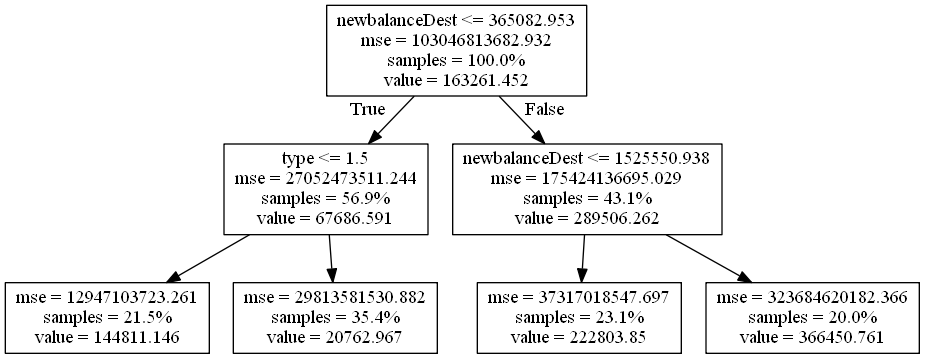

In [39]:
# Afficher le graphique
Image(graph.create_png())